In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from utils import check_nan, check_unique
from matplotlib import gridspec
from matplotlib import rcParams
#Paramètres graphiques 
rcParams['figure.figsize'] = 15,8 #Taille de la figure affichée
sns.set_style("darkgrid")#style de l'arrière plan de seaborn 
sns.set_palette("pastel")#Couleurs utilisées dans les graphiques 
plt.rcParams["figure.dpi"] = 200 #dpi = dot per inch , résolution des graphiques 
pd.set_option('display.max_columns', 500) #Nombre de colonne maximum du dataframe à afficher

import warnings
warnings.simplefilter(action='ignore')

# Lecture et mise en forme des données

# Mise en forme des données à partir du fichier de base : 

In [2]:
data=pd.read_csv("./data/delays.csv")
df=data.drop_duplicates()#On enlève les lignes en double
print("lignes absolument identiques : "+str(len(data)-len(df)))

df["datetime"]=pd.to_datetime(df["datetime"])
df["date"]=pd.to_datetime(df["date"]).dt.date
df[['depart','destination']] = df["connection"].str.split(" - ",expand=True,)

df=df[["id","carrier","connection","depart","destination","date","arrival","datetime","name","delay"]]
df.columns=["id_train","transporteur","trajet","depart","destination","date_depart","horaire_prevue","datetime_save","station_traitee","retard_prevu"]

df[["heure_arrivee","min_arrivee"]]= df["horaire_prevue"].str.split(":",expand=True)
df=df[df["horaire_prevue"]!='Nie dotyczy']

df["retard_prevu"]=df["retard_prevu"].apply(lambda x : int(x.split(" ")[0]))



#Labelisation des lignes : 
#partie longue 
columns_sort=["depart","destination","date_depart","horaire_prevue","datetime_save"]
columns_keep=["datetime_save","id_train","date_depart","depart","destination","station_traitee","horaire_prevue"]

df_temp=df.sort_values(columns_sort)[columns_keep].reset_index().rename(columns={"index":"index_init"})
bornes= df_temp[df_temp["station_traitee"]==df_temp["destination"]].index.tolist()

df_temp[["index_init","depart","destination","station_traitee"]]
borne_inf=0

df["itineraire"]=np.nan
df["itineraire_id"]=np.nan

for count, borne_sup in enumerate(tqdm(bornes)) :    
    iti, ind = np.unique([df_temp.iloc[borne_inf]["depart"]]+df_temp.iloc[borne_inf:borne_sup]["station_traitee"].tolist(), return_index=True)

    df.loc[df_temp.iloc[borne_inf:borne_sup+1]["index_init"],"itineraire"]="|".join(iti[np.argsort(ind)])
    df.loc[df_temp.iloc[borne_inf:borne_sup+1]["index_init"],"itineraire_id"]=count
    borne_inf=borne_sup+1

    

df.to_csv("./data/delays_transformed.csv", index=False)
df.head()

lignes absolument identiques : 180830


100%|██████████| 511543/511543 [32:48<00:00, 259.92it/s]   


,id_train,transporteur,trajet,depart,destination,date_depart,horaire_prevue,datetime_save,station_traitee,retard_prevu,heure_arrivee,min_arrivee,itineraire,itineraire_id
0,41002/3 (102) POLONIA,PKP Intercity,Bohumin - Warszawa Wschodnia,Bohumin,Warszawa Wschodnia,2022-05-15,21:31,2022-05-16,Warszawa Zachodnia,162,21,31,Bohumin|Gliwice|Zabrze|Katowice|Mysłowice|Krak...,8141.0
1,91888/9 (102),Koleje Mazowieckie,Siedlce - Warszawa Zachodnia,Siedlce,Warszawa Zachodnia,2022-05-16,00:15,2022-05-16,Warszawa Zachodnia,0,00,15,Siedlce|Warszawa Stadion|Warszawa Powiśle|Wars...,343944.0
2,21644/5 (102),Koleje Mazowieckie,Radom Główny - Warszawa Wschodnia,Radom Główny,Warszawa Wschodnia,2022-05-16,00:29,2022-05-16,Warszawa Zachodnia,0,00,29,Radom Główny|Warszawa Służewiec|Warszawa Zacho...,328891.0
3,19300/1 (102),Koleje Mazowieckie,Warszawa Wschodnia - Grodzisk Mazowiecki,Warszawa Wschodnia,Grodzisk Mazowiecki,2022-05-16,00:34,2022-05-16,Warszawa Zachodnia,0,00,34,Warszawa Wschodnia|Warszawa Stadion|Warszawa P...,410654.0
4,38170/1 (102) USTRONIE,PKP Intercity,Kraków Główny - Kołobrzeg,Kraków Główny,Kołobrzeg,2022-05-16,00:55,2022-05-16,Warszawa Zachodnia,0,00,55,Kraków Główny|Warszawa Służewiec|Warszawa Zach...,186003.0


# Lecture du fichier de données transformé : 

In [2]:
df=pd.read_csv("./data/delays_transformed.csv")

In [3]:
check_unique(df)

Valeurs uniques dans id_train : 7947
Valeurs uniques dans transporteur : 10
Valeurs uniques dans trajet : 995
Valeurs uniques dans depart : 284
Valeurs uniques dans destination : 200
Valeurs uniques dans date_depart : 16
Valeurs uniques dans horaire_prevue : 1390
Valeurs uniques dans datetime_save : 4032
Valeurs uniques dans station_traitee : 95
Valeurs uniques dans retard_prevu : 358
Valeurs uniques dans heure_arrivee : 24
Valeurs uniques dans min_arrivee : 60
Valeurs uniques dans itineraire : 1463
Valeurs uniques dans itineraire_id : 511543


In [4]:
check_nan(df)

Valeurs nan dans id_train : 0
Valeurs nan dans transporteur : 0
Valeurs nan dans trajet : 0
Valeurs nan dans depart : 0
Valeurs nan dans destination : 0
Valeurs nan dans date_depart : 0
Valeurs nan dans horaire_prevue : 0
Valeurs nan dans datetime_save : 0
Valeurs nan dans station_traitee : 0
Valeurs nan dans retard_prevu : 0
Valeurs nan dans heure_arrivee : 0
Valeurs nan dans min_arrivee : 0
Valeurs nan dans itineraire : 0
Valeurs nan dans itineraire_id : 0


# Exploration des données : 

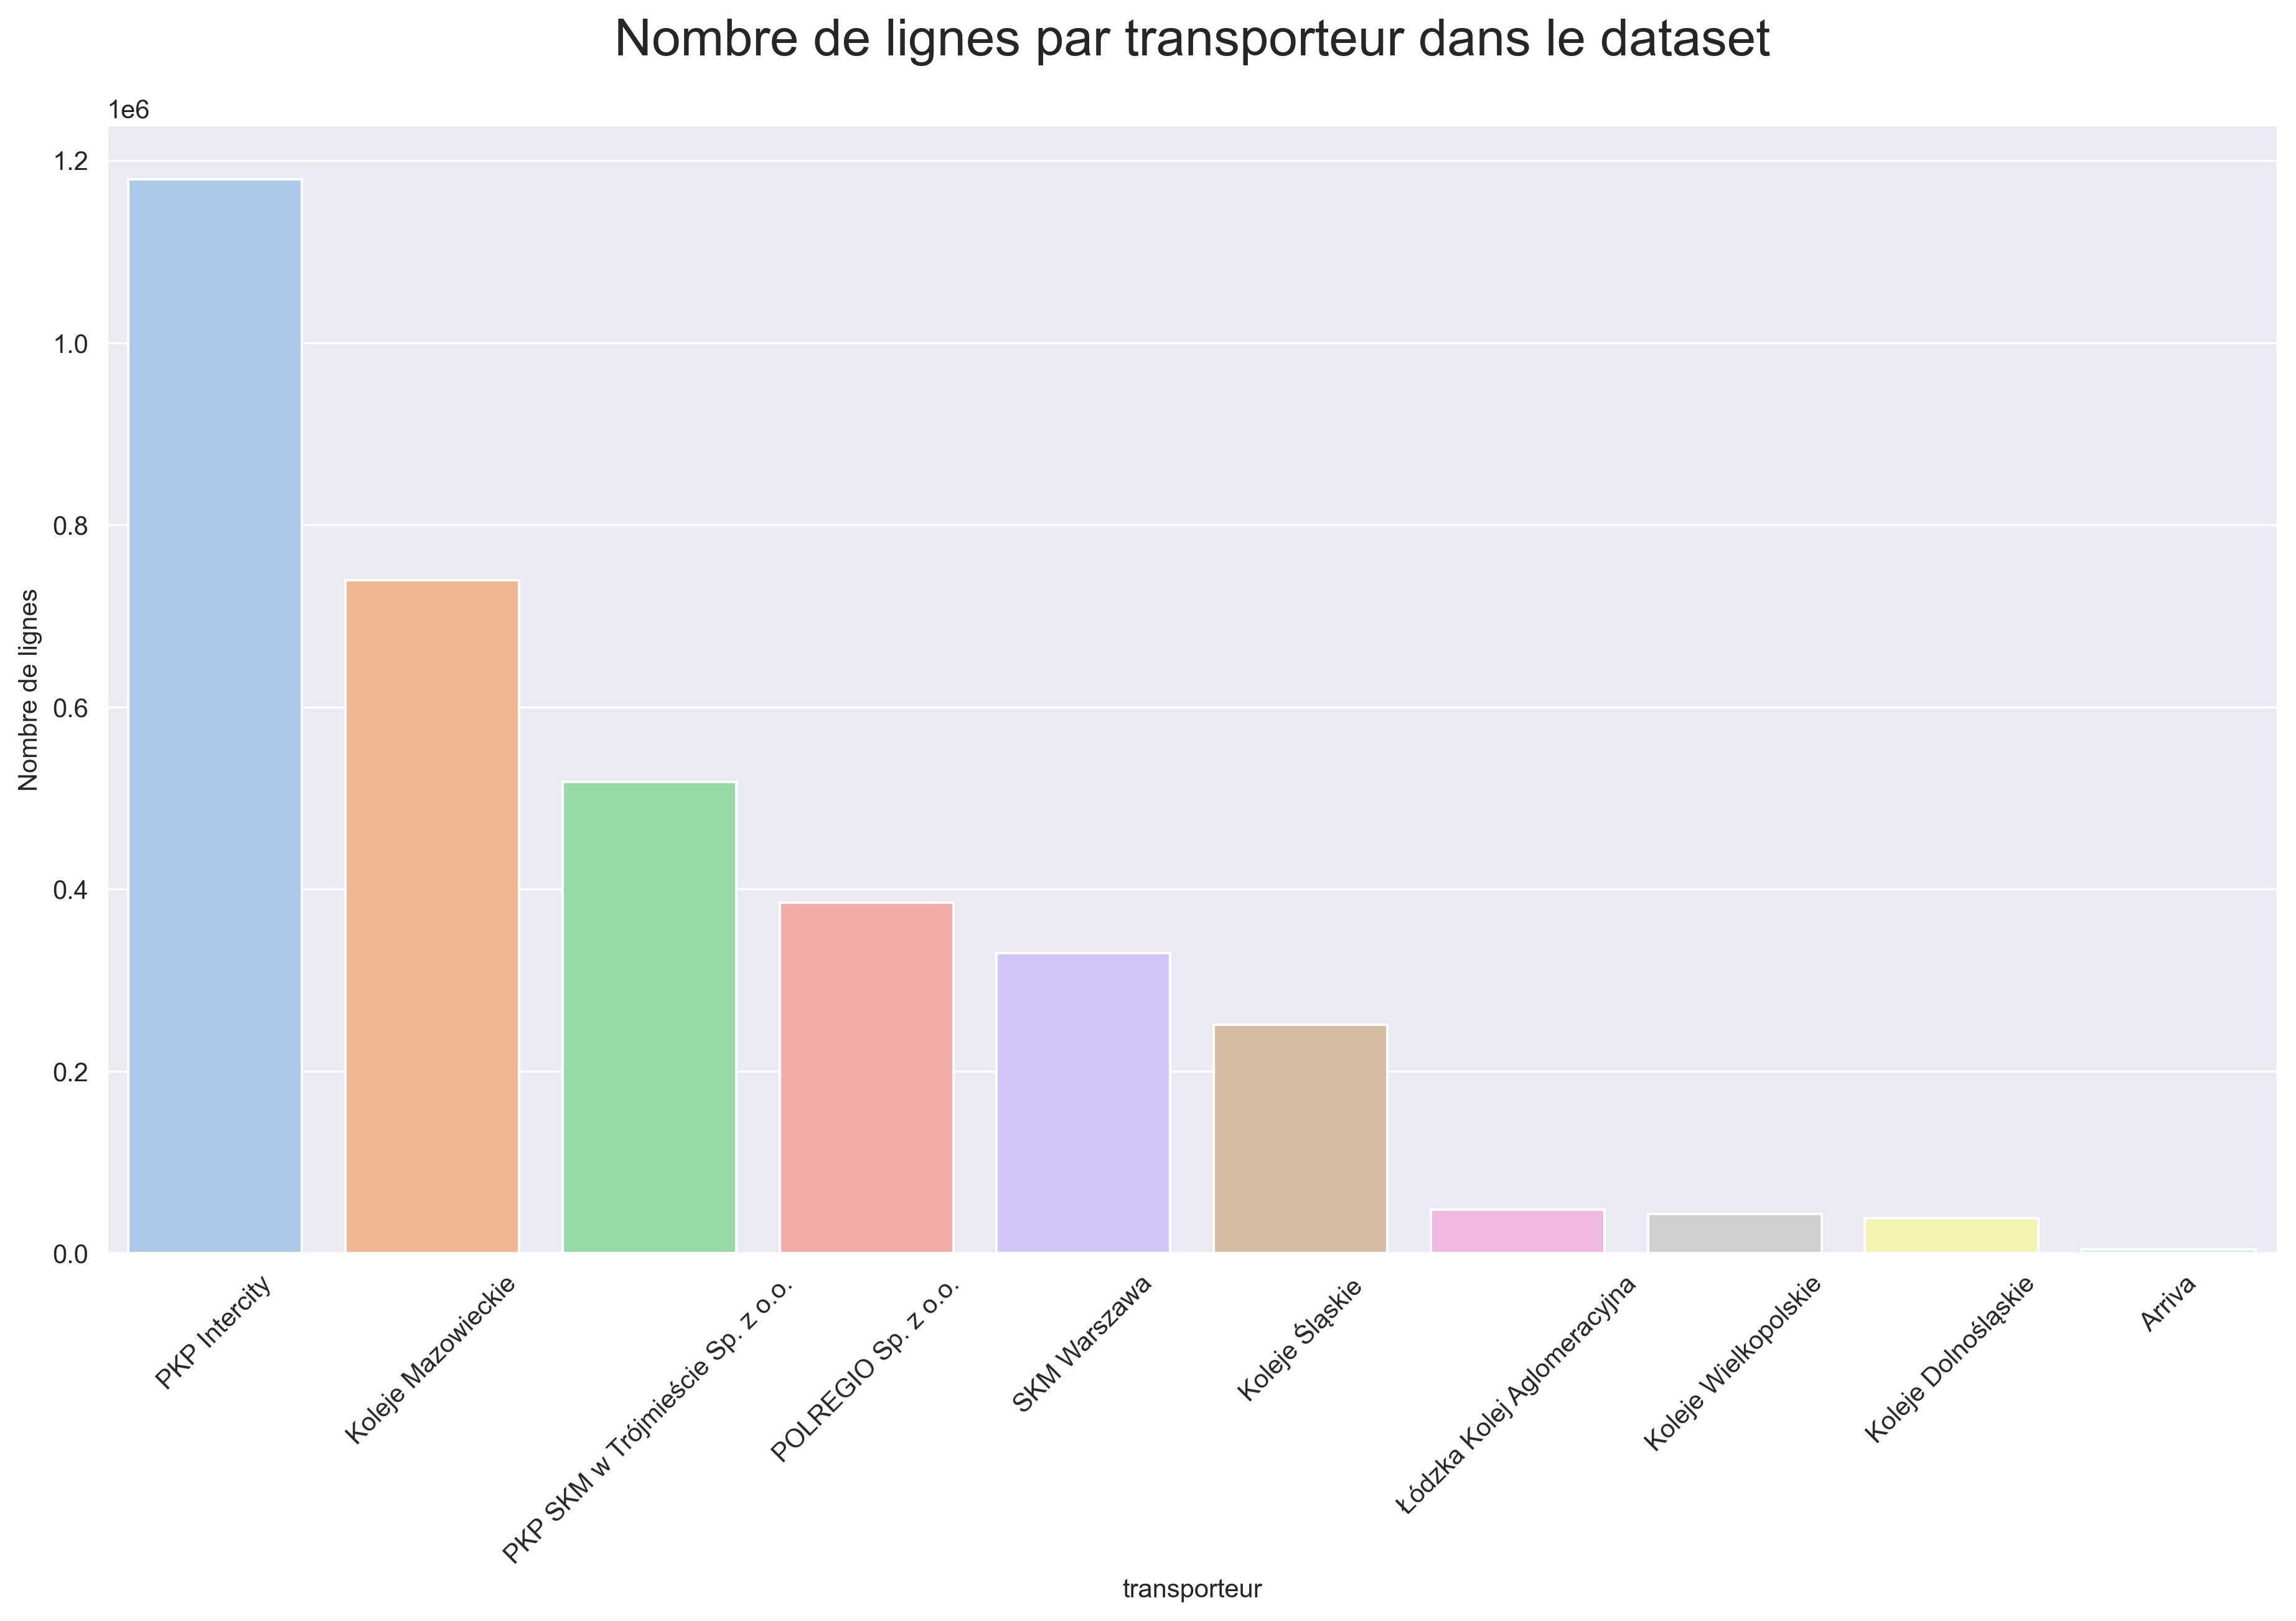

In [188]:
sns.barplot(data=df.groupby("transporteur").agg("count").sort_values("id_train",ascending=False).rename(columns={"id_train":"Nombre de lignes"}).reset_index(), 
            x="transporteur",
            y="Nombre de lignes")
plt.title("Nombre de lignes par transporteur dans le dataset\n",fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [247]:
#Nombre moyen de lignes enregistrées toutes les 5 minutes 
df.groupby("datetime_save").agg("count").mean()

id_train           877.316468
transporteur       877.316468
trajet             877.316468
depart             877.316468
destination        877.316468
date_depart        877.316468
horaire_arrivee    877.316468
station_traitee    877.316468
retard_prevu       877.316468
heure_arrivee      877.316468
min_arrivee        877.128472
dtype: float64

In [180]:
df[(df["id_train"]=='10102/3  ZAMENHOF')  & (df["datetime_save"]==datetime.strptime('2022-05-17 20:10:00','%Y-%m-%d %H:%M:%S'))]

,id_train,transporteur,trajet,depart,destination,date_depart,horaire_arrivee,datetime_save,last_station,retard_prevu,heure_arrivee,min_arrivee
517008,10102/3 ZAMENHOF,PKP Intercity,Warszawa Zachodnia - Białystok,Warszawa Zachodnia,Białystok,2022-05-17,20:18,2022-05-17 20:10:00,Warszawa Centralna,0,20,18
517180,10102/3 ZAMENHOF,PKP Intercity,Warszawa Zachodnia - Białystok,Warszawa Zachodnia,Białystok,2022-05-17,20:30,2022-05-17 20:10:00,Warszawa Wschodnia,0,20,30


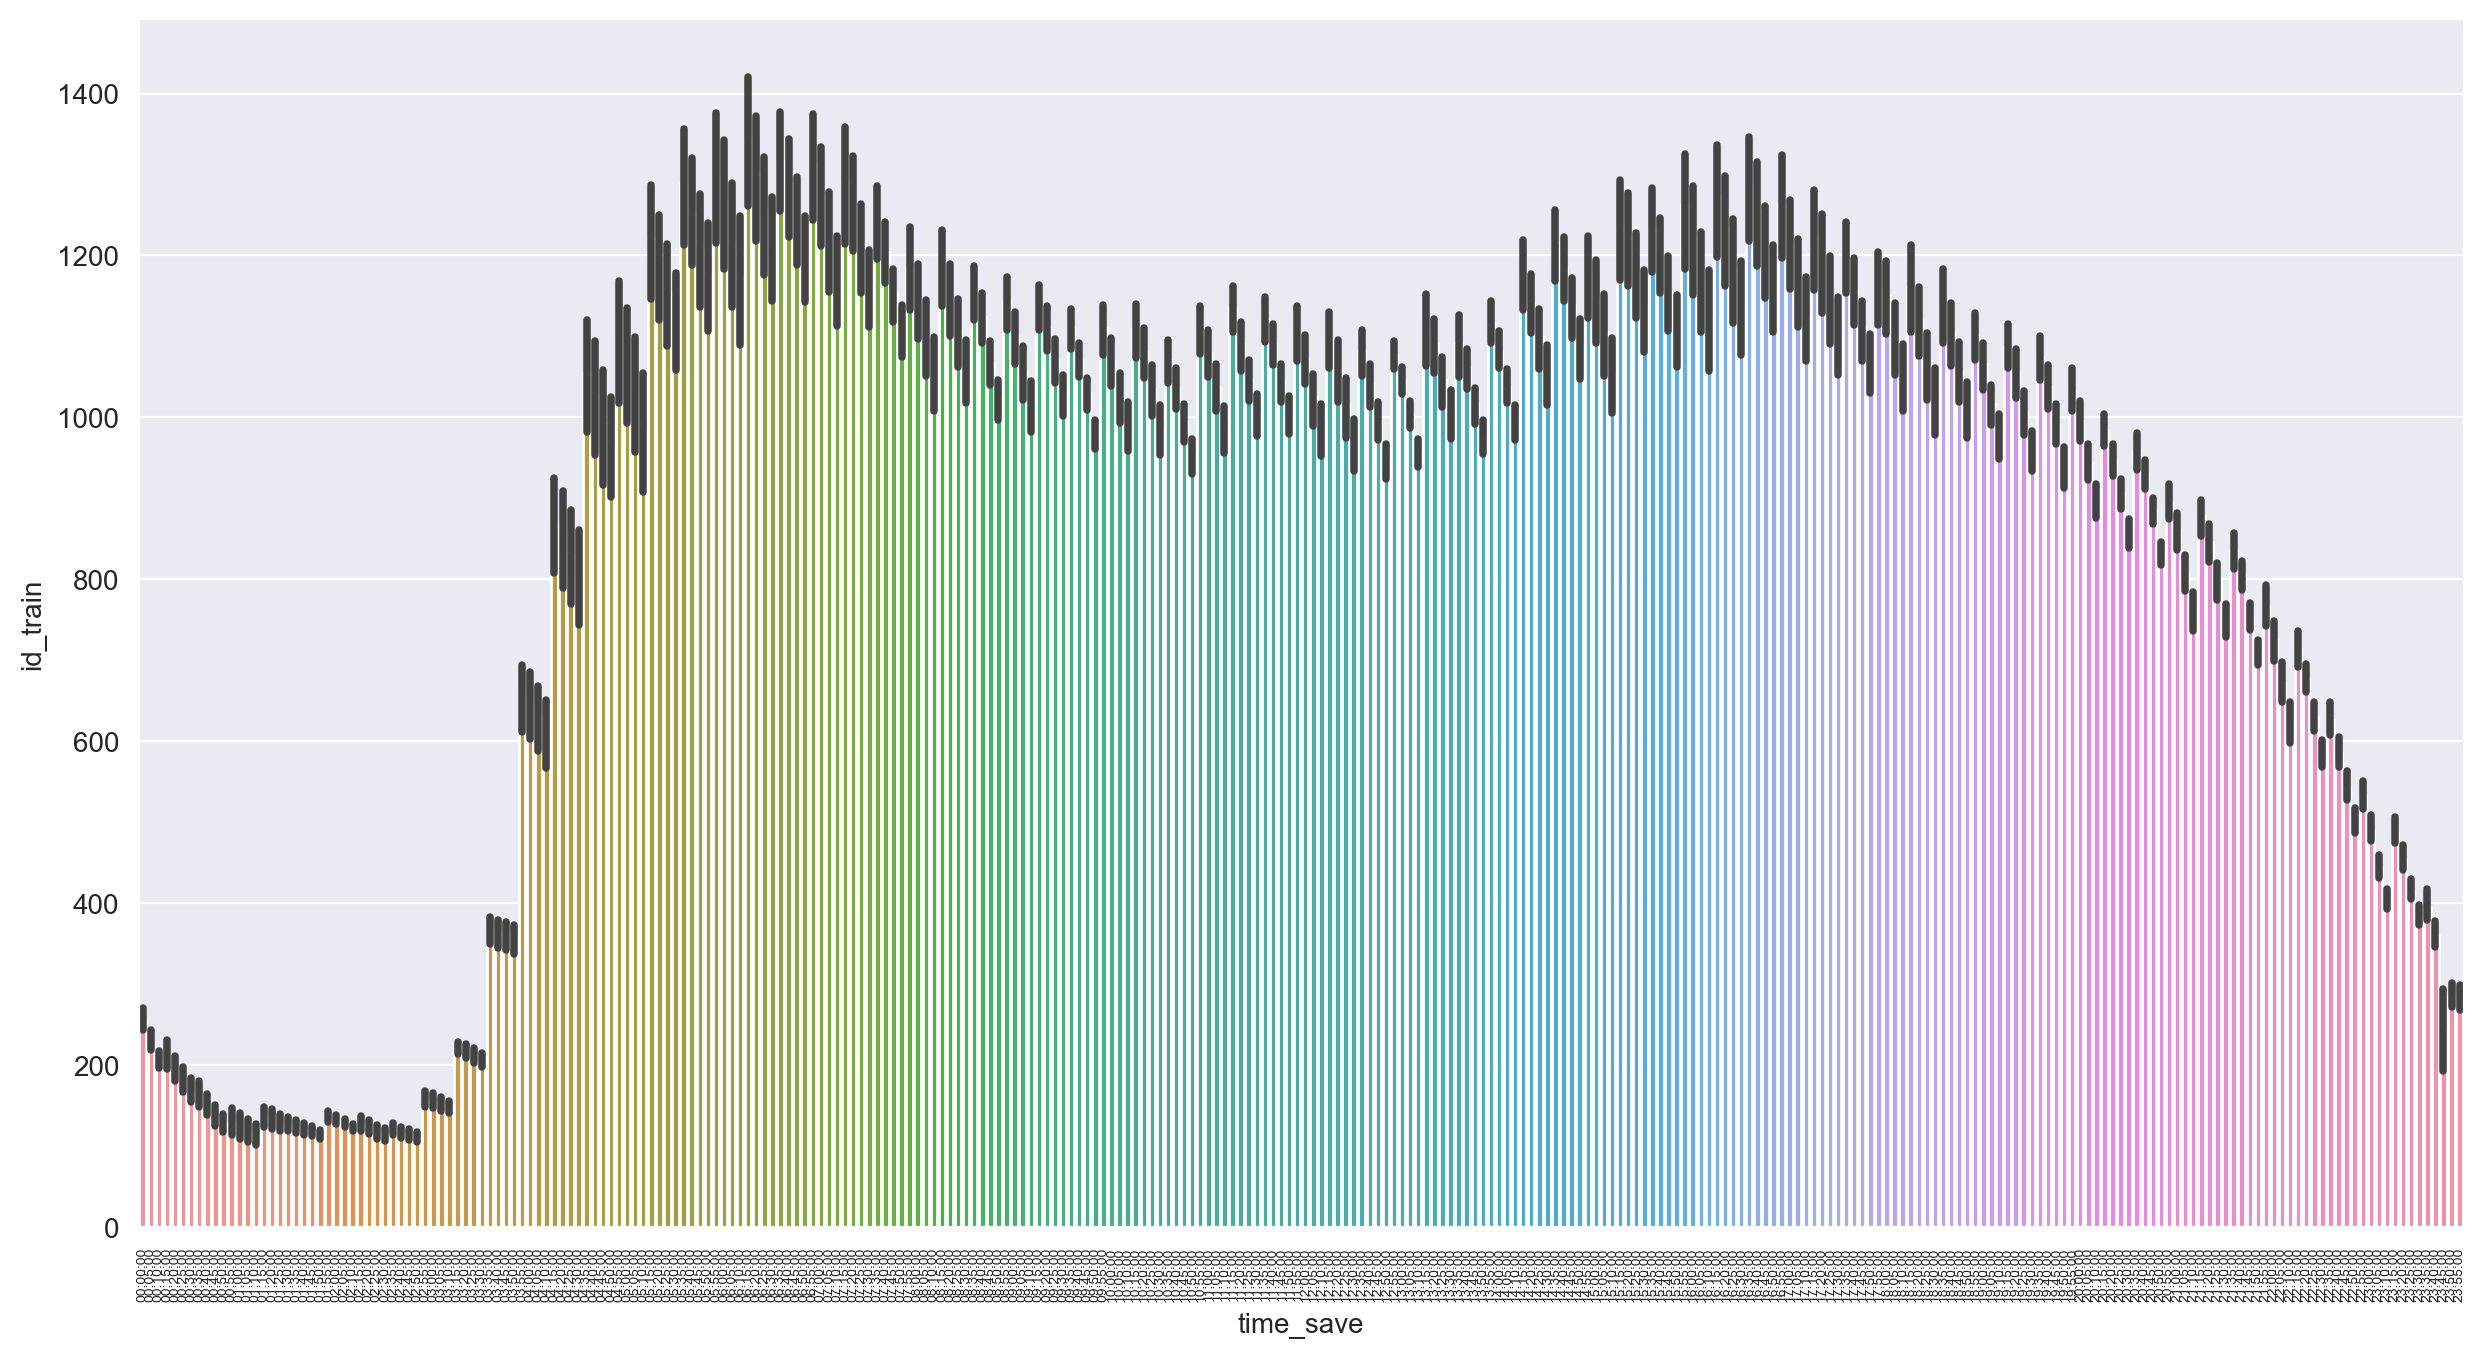

In [211]:
df_temp =df.copy(deep=True)
df_temp["date_save"]=df_temp["datetime_save"].dt.date
df_temp["time_save"]=df_temp["datetime_save"].dt.time

sns.barplot(data=df_temp.groupby(["date_save","time_save"]).agg("count").reset_index().sort_values("time_save"),
           x="time_save",y="id_train")
plt.xticks(rotation=90, fontsize=5)
plt.show()

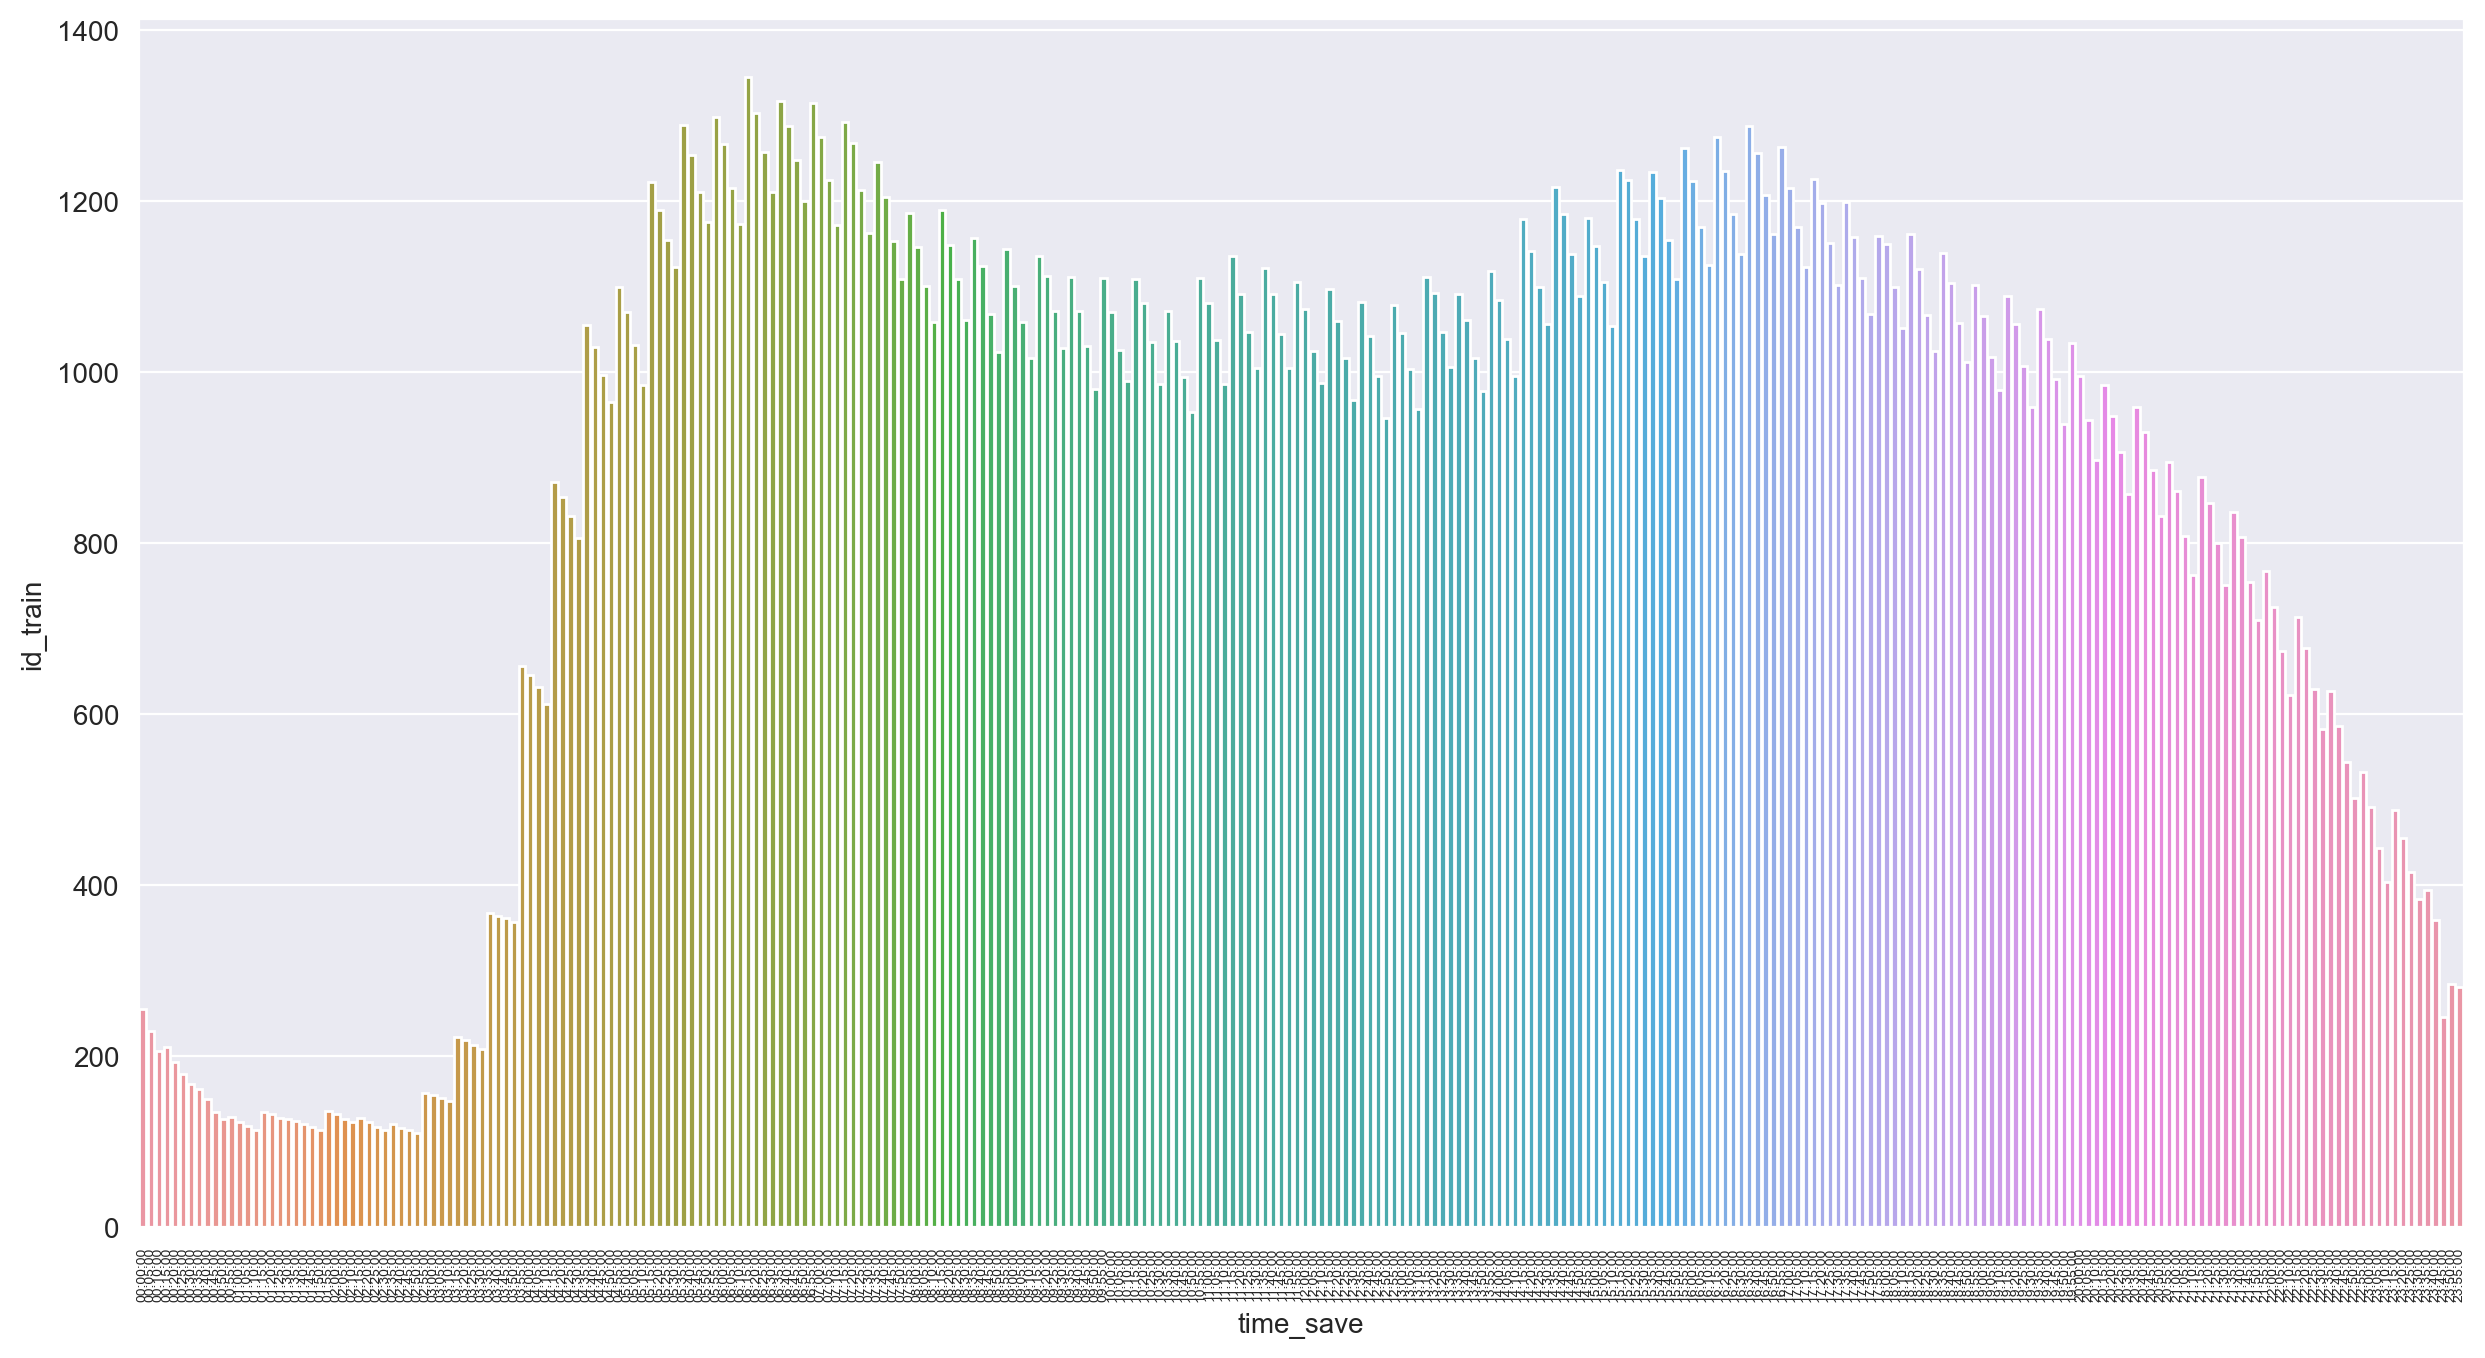

In [207]:
df_temp =df.copy(deep=True)
df_temp["date_save"]=df_temp["datetime_save"].dt.date
df_temp["time_save"]=df_temp["datetime_save"].dt.time

sns.barplot(data=df_temp.groupby(["date_save","time_save"]).agg("count").reset_index().groupby("time_save").agg("mean").reset_index().sort_values("time_save"),
           x="time_save",y="id_train")
plt.xticks(rotation=90, fontsize=5)
plt.show()

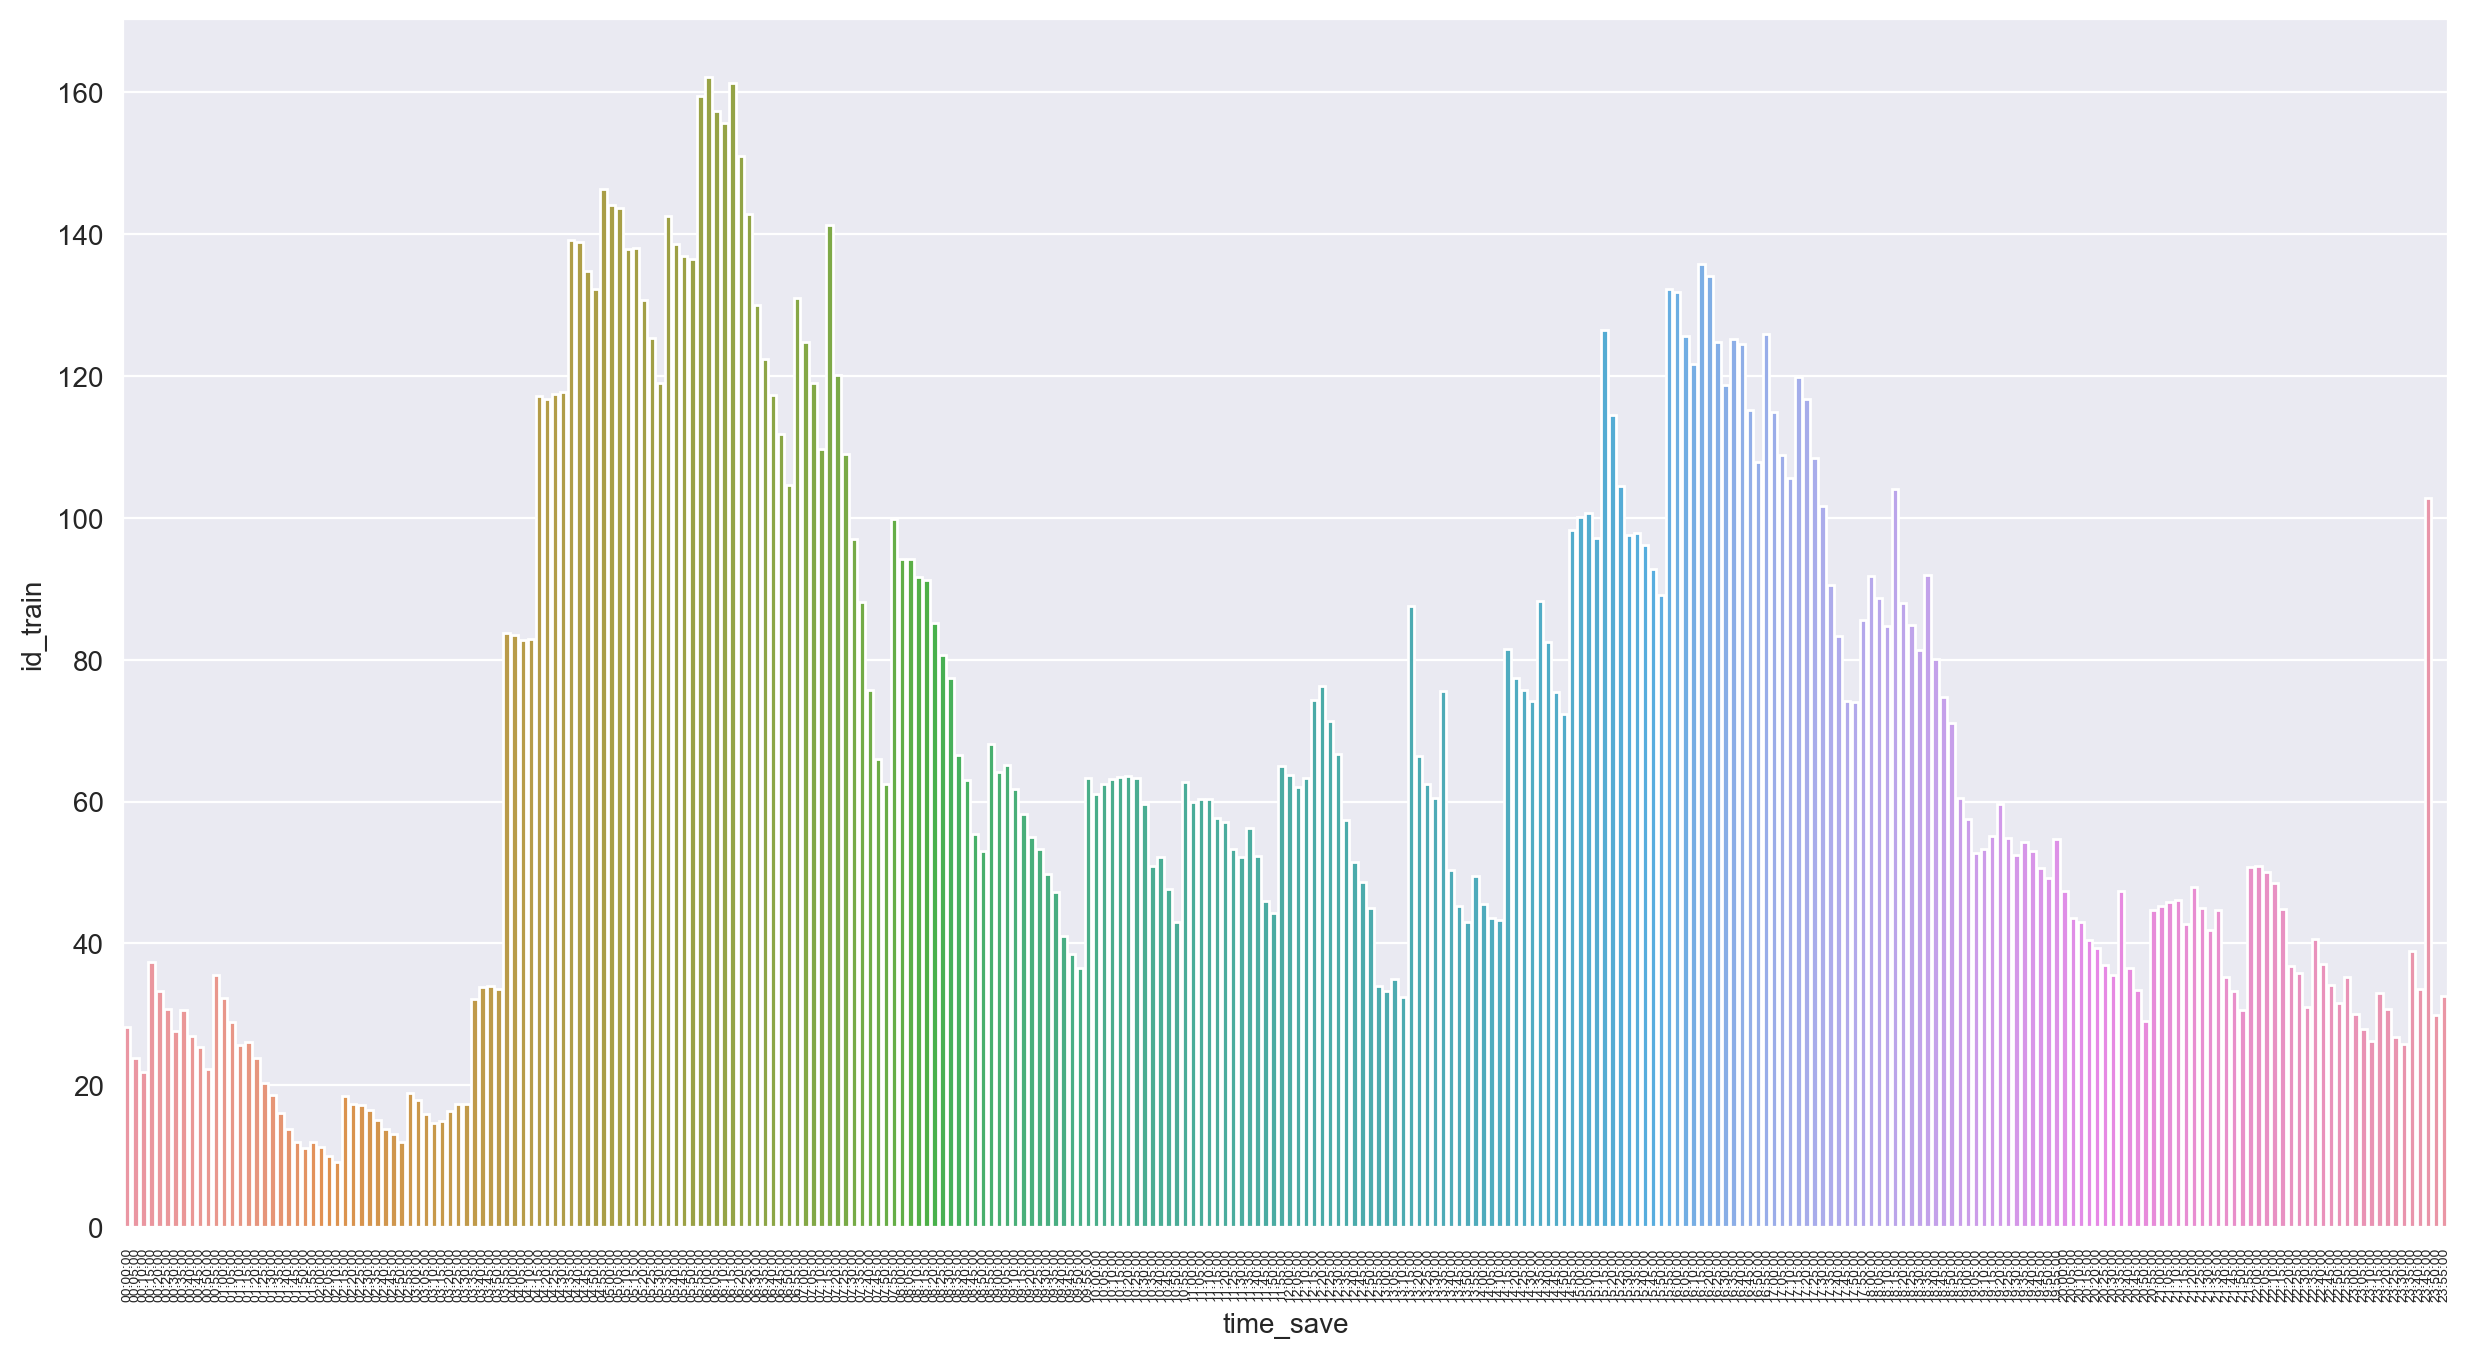

In [204]:
df_temp =df.copy(deep=True)
df_temp["date_save"]=df_temp["datetime_save"].dt.date
df_temp["time_save"]=df_temp["datetime_save"].dt.time

sns.barplot(data=df_temp.groupby(["date_save","time_save"]).agg("count").reset_index().groupby("time_save").agg("std").reset_index().sort_values("time_save"),
           x="time_save",y="id_train")


plt.xticks(rotation=90, fontsize=5)
plt.show()

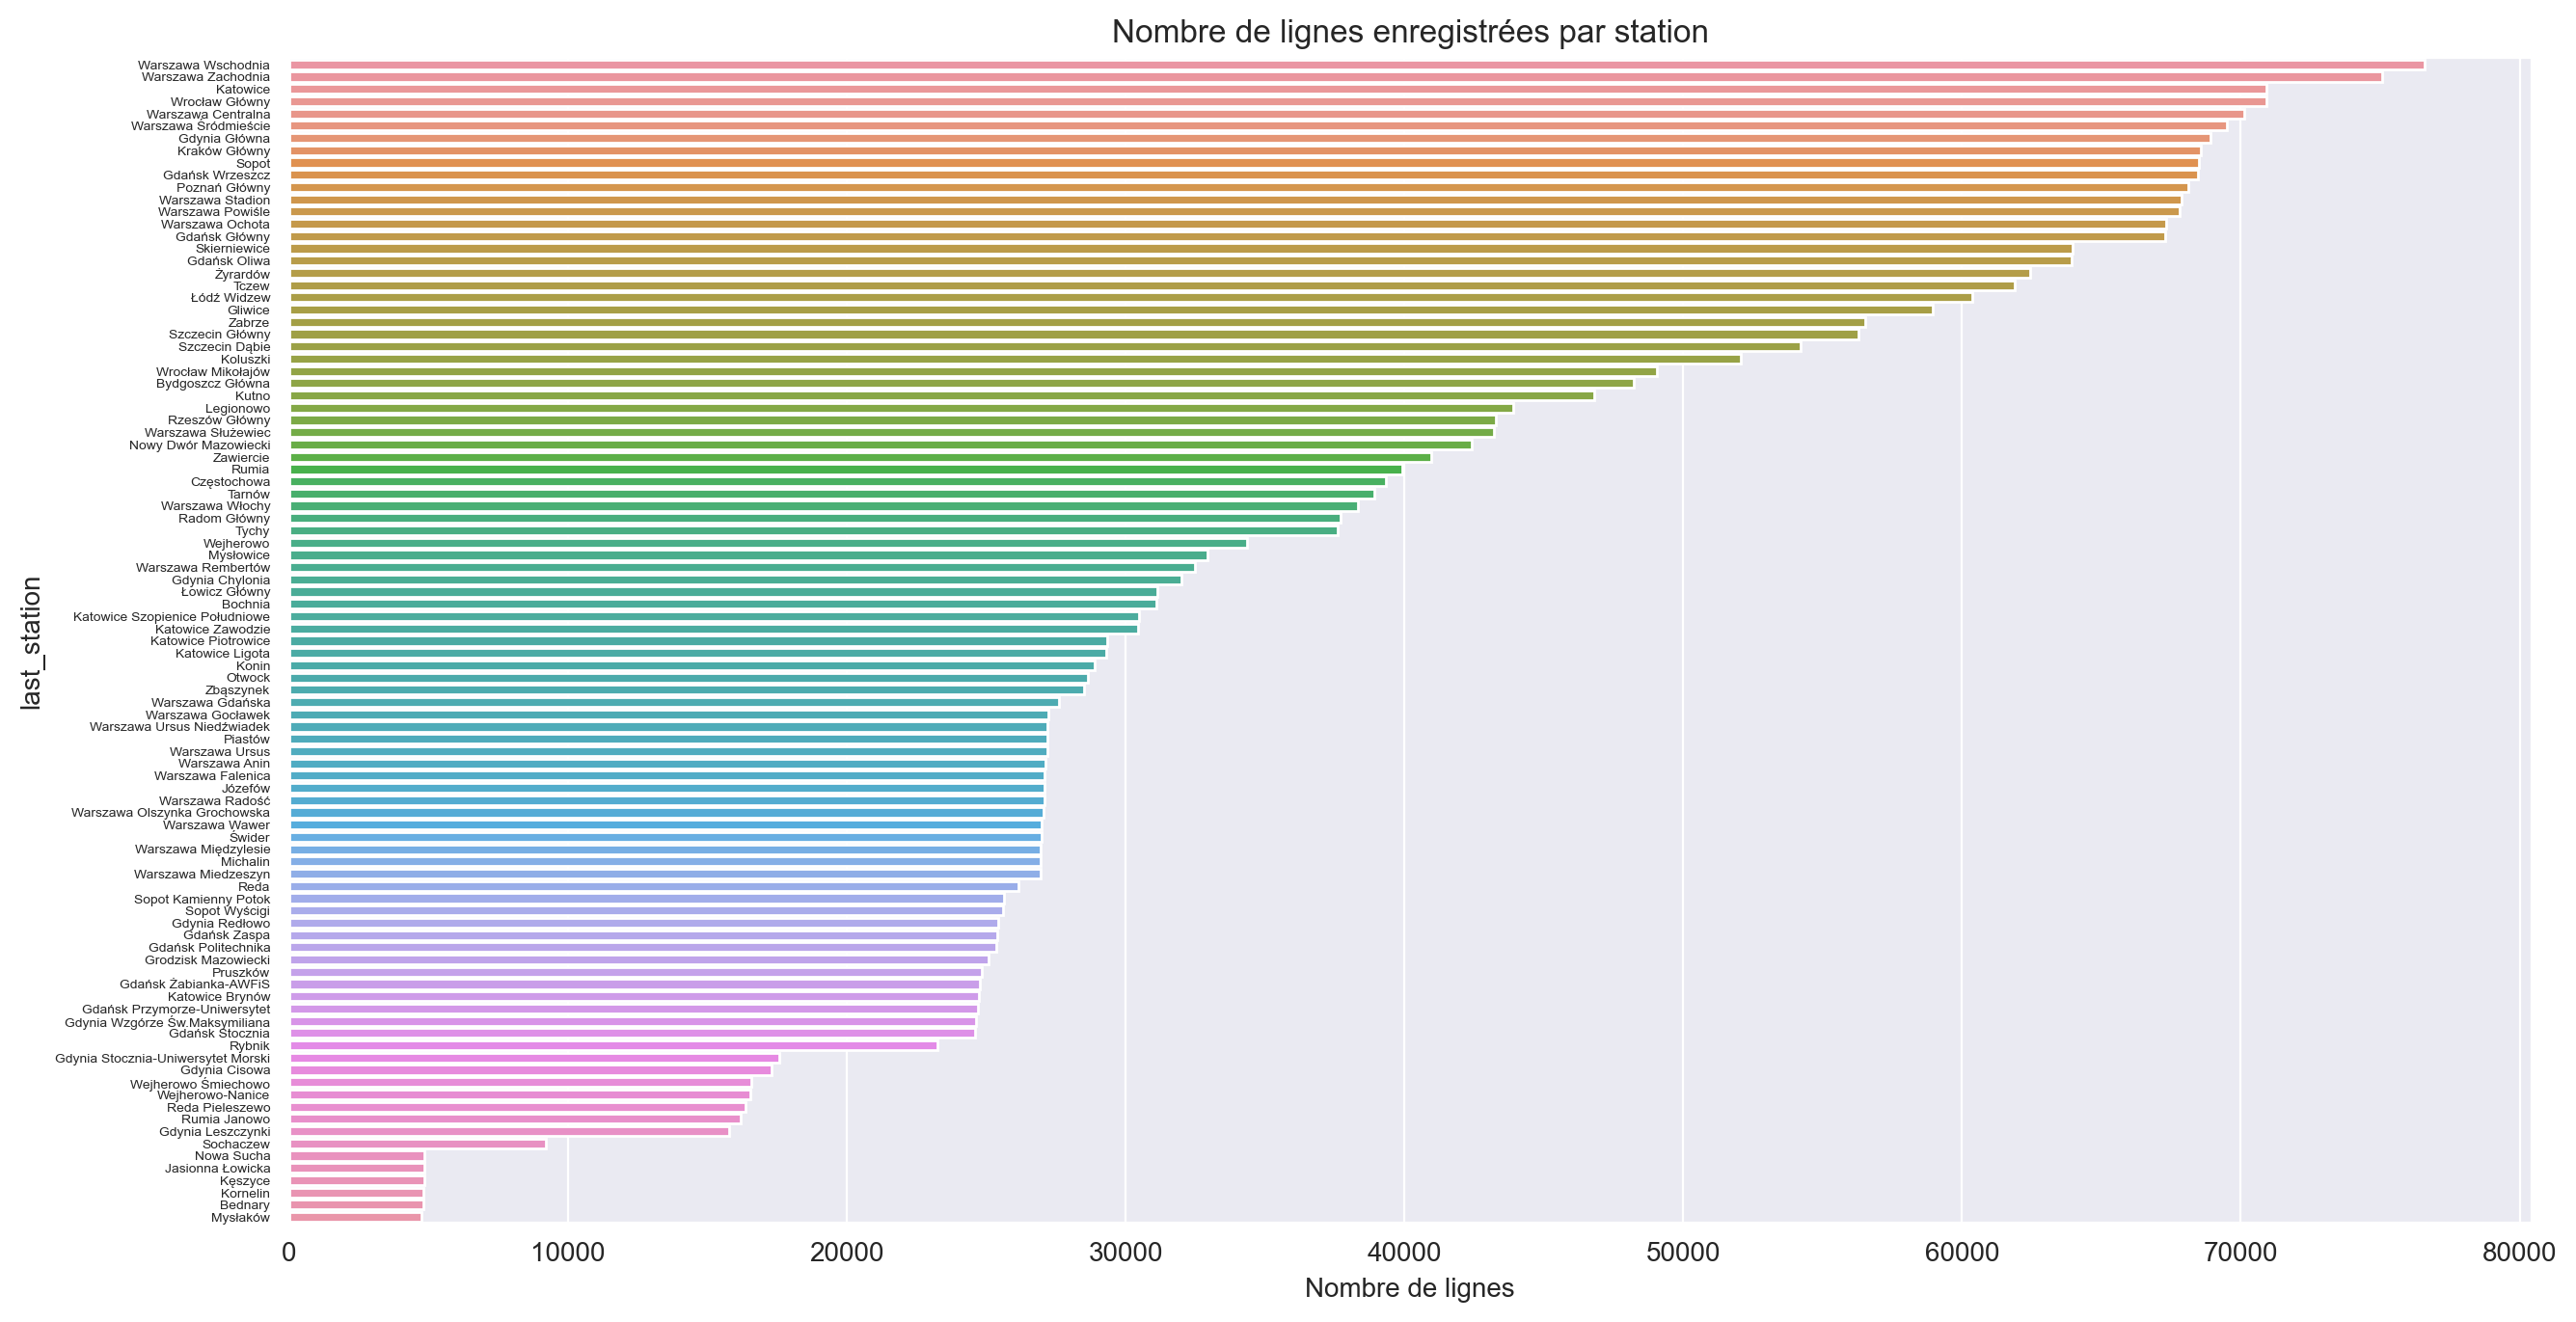

In [222]:
sns.barplot(data=df.groupby(["last_station"]).agg("count").reset_index().sort_values("retard_prevu",ascending=False),x="retard_prevu",y="last_station")

plt.yticks(fontsize=5)
plt.title("Nombre de lignes enregistrées par station")
plt.xlabel("Nombre de lignes")
plt.show()

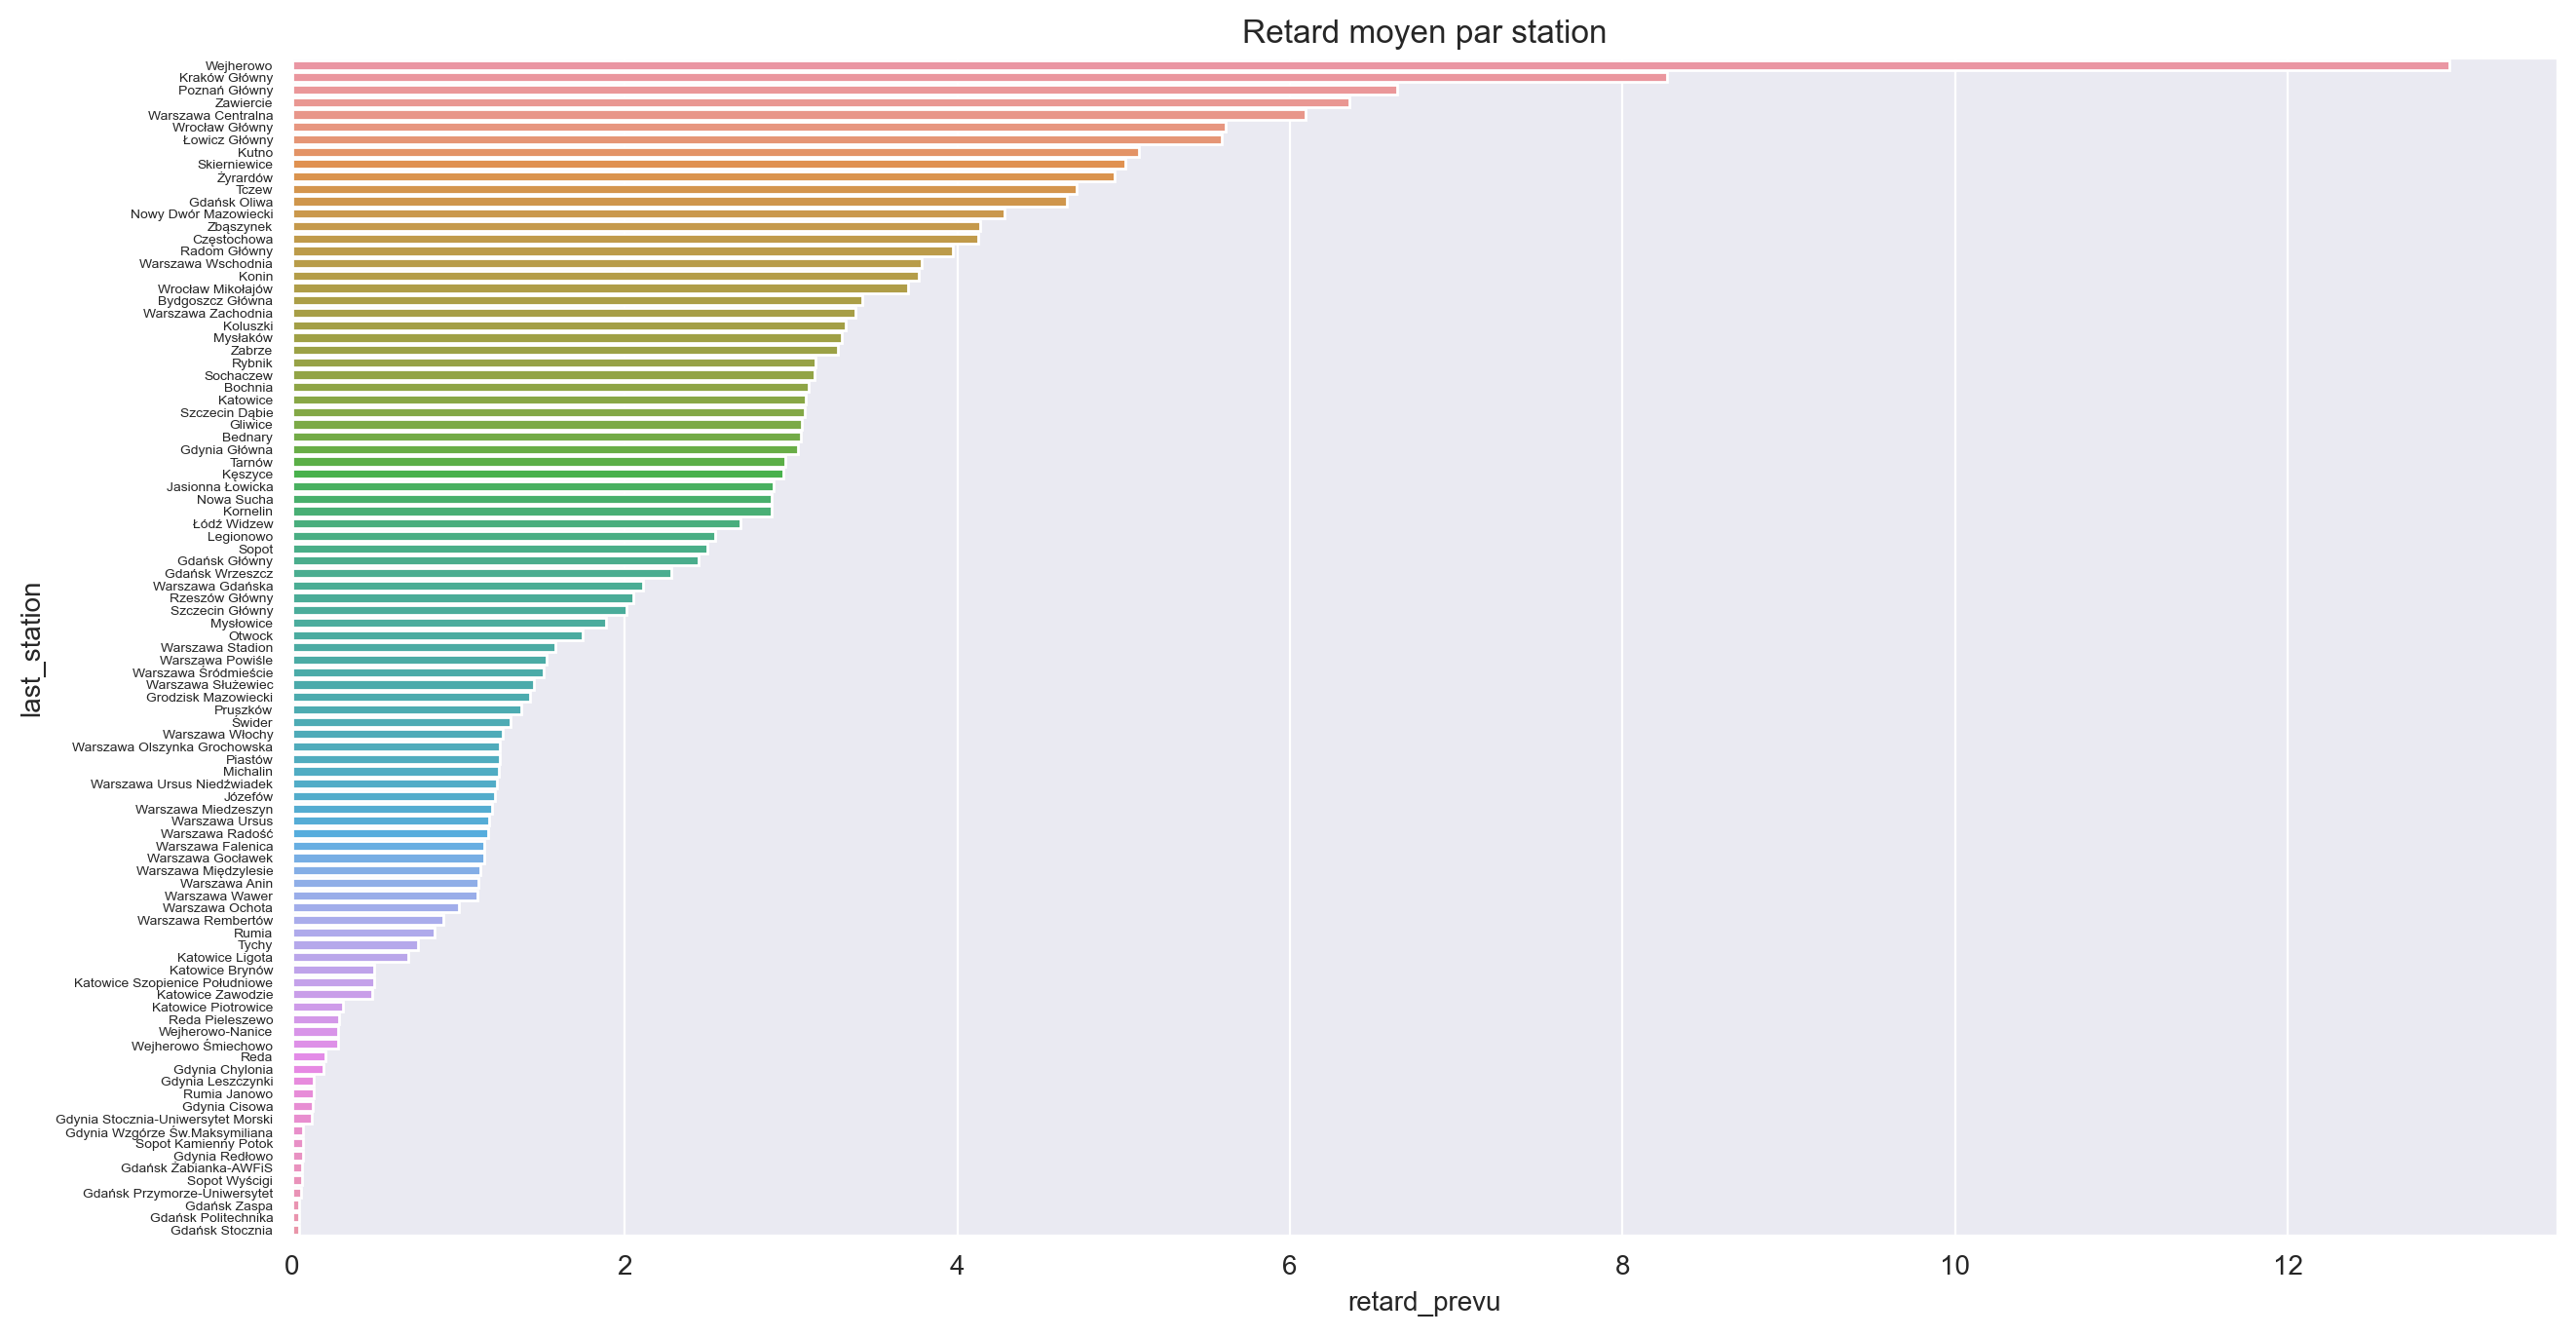

In [225]:
df_temp=df.groupby(["id_train","trajet","last_station"]).agg("mean").groupby("last_station").agg("mean").reset_index().sort_values("retard_prevu",ascending=False)
sns.barplot(data=df_temp,x="retard_prevu",y="last_station")

plt.yticks(fontsize=5)
plt.title("Retard moyen par station")
plt.show()